In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv(r'/content/covid.csv')


In [5]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2.0,1.0,4/5/2020,2/5/2020,9999-99-99,97.0,2.0,27.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,97.0
1,1009bf,2.0,1.0,19-03-2020,17-03-2020,9999-99-99,97.0,2.0,24.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,97.0
2,167386,1.0,2.0,6/4/2020,1/4/2020,9999-99-99,2.0,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,99.0,1.0,2.0
3,0b5948,2.0,2.0,17-04-2020,10/4/2020,9999-99-99,2.0,1.0,30.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,2.0
4,0d01b5,1.0,2.0,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,99.0,1.0,2.0


In [7]:
print(df.shape)

(566602, 23)


In [8]:
print(df.columns.size)
df.columns

23


Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

**Data Pre-processing**
1. Data Cleaning

In [9]:
for i in df.columns:
    if i in ['id','entry_date','date_symptoms','date_died','age']:
        continue
    else:
        print('unique values in '+ i +' column- ',end=' ')
        print(df[i].unique())

unique values in sex column-  [2 1]
unique values in patient_type column-  [1 2]
unique values in intubed column-  [97  2  1 99]
unique values in pneumonia column-  [ 2  1 99]
unique values in pregnancy column-  [97  2  1 98]
unique values in diabetes column-  [ 2  1 98]
unique values in copd column-  [ 2  1 98]
unique values in asthma column-  [ 2  1 98]
unique values in inmsupr column-  [ 2  1 98]
unique values in hypertension column-  [ 2  1 98]
unique values in other_disease column-  [ 2  1 98]
unique values in cardiovascular column-  [ 2  1 98]
unique values in obesity column-  [ 2  1 98]
unique values in renal_chronic column-  [ 2  1 98]
unique values in tobacco column-  [ 2  1 98]
unique values in contact_other_covid column-  [ 2 99  1]
unique values in covid_res column-  [1 2 3]
unique values in icu column-  [97  2  1 99]


1.1 Data Descriptors

These features are categorical so we convert them into different categories as follows:

(a) Sex:- Female (1), Male (2)

(b) Patient_type:- Outpatient (1), Inpatient (2)

(c) Columns with preconditions like pregnancy, diabetes, copd, asthma etc:- Yes (1), No (2)

(d) Covid result:- Positive (1), Negative (2), Results Awaited (3)

The values 97, 98, 99 indicate that the data is not available for these cells.

Okay great! Now that we have the available descriptors of each column, we can move forward with the cleaning and wrangling of the data.

In [10]:
df.info()
print('\nCovid Result positive-',len(df[df['covid_res']==1]))  #Covid Result positive
print('Covid Result negative-',len(df[df['covid_res']==2]))  #Covid Result negative
print('Covid result awaited-',len(df[df['covid_res']==3]))  #Covid result awaited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [ ]:
No null values present in the data¶


In [12]:
date_cols=['entry_date','date_symptoms']
for dates in date_cols:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

# cleaning Date_died column
df['date_died'].replace('9999-99-99','NA',inplace=True)
date_cols.append('date_died')
#df[date_cols_2]
df[date_cols]

,entry_date,date_symptoms,date_died
0,2020-04-05,2020-02-05,NA
1,2020-03-19,2020-03-17,NA
2,2020-06-04,2020-01-04,NA
3,2020-04-17,2020-10-04,NA
4,2020-04-13,2020-04-13,22-04-2020
...,...,...,...
566597,2020-05-13,2020-03-05,NA
566598,2020-07-04,2020-06-04,NA
566599,2020-05-14,2020-01-05,NA
566600,2020-05-31,2020-05-29,NA


In [13]:
df=df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]

In [14]:
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

df.iloc[:,-2]=df.iloc[:,-2].replace('Yes','Positive')
df.iloc[:,-2]=df.iloc[:,-2].replace('No','Negative')
df.iloc[:,-2]=df.iloc[:,-2].replace(3,'Results awaited')

**2. Data Visualization**

Null value Heatmap

Text(0.5, 1.0, 'Null value heatmap')

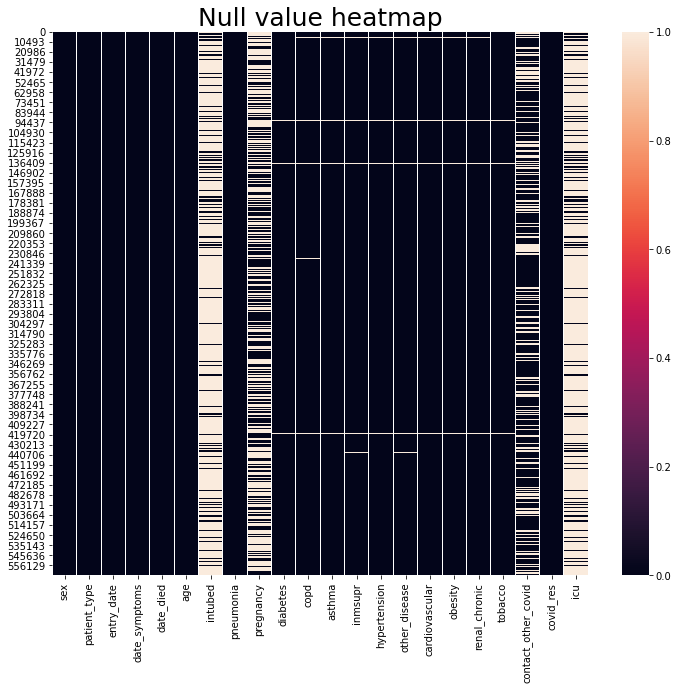

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.title('Null value heatmap',size=25)

Since we are focusing on giving the chances of being affected by corona,so our main focus will be on either chance is positive or negative, hence we'll neglect awaiting chances.. Now here i am dropping all those rows which contains chance is awaiting i.e.3 value

In [16]:
df=df[df['covid_res']!='Results awaited']

**1. Intubation**

In [17]:
df['intubed'].isna().value_counts()
# True indicates the NULL Values

True     392268
False    107424
Name: intubed, dtype: int64

Text(0.5, 1.0, 'Reported intubations \n \n  Ratio=11')

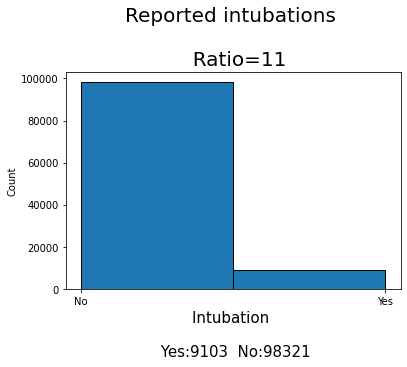

In [18]:
#FROM THE REPORTED INTUBATION
%matplotlib inline
# plt.figure(figsize=(8,10))
ax=plt.hist(df['intubed'][df['intubed'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('Reported intubations \n \n  Ratio={0:.0f}'.format(df['intubed'].value_counts()[0]/df['intubed'].value_counts()[1])
          ,size=20)

**Intubation test positivity**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 6.79999999999999, 'Results \n Test postivity rate: 71.94 %')

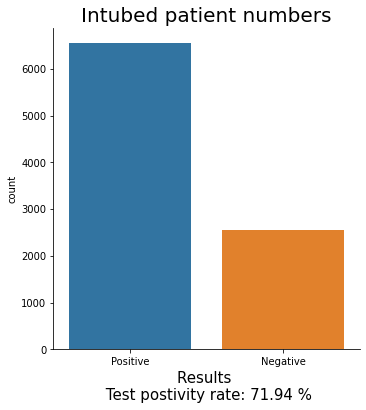

In [19]:
df_intubed=df[df['intubed']=='Yes']
sns.catplot('covid_res',data=df_intubed,kind='count')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_intubed['covid_res'].value_counts()[0]/df_intubed['covid_res'].size),size=15)

Intubation is a good indicator, so as to predict whether the person is Covid +ve or not

**2. Pregnancy**

In [20]:
df['pregnancy'].isna().value_counts()
# True indicates the NULL Values
# False indicates total reported pregnancy (might be yes or no)

True     254434
False    245258
Name: pregnancy, dtype: int64

Text(0.5, 1.0, 'Reported pregnancy \n \n  Ratio=67')

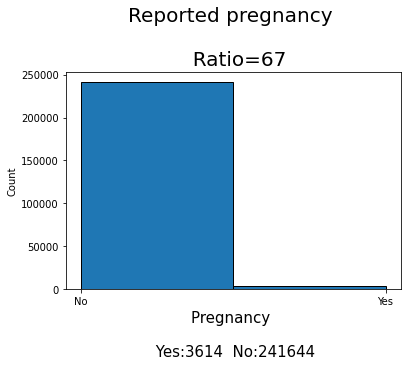

In [21]:
ax=plt.hist(df['pregnancy'][df['pregnancy'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('Pregnancy \n \n Yes:{}  No:{}'.format(df['pregnancy'].value_counts()[1] , df['pregnancy'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('Reported pregnancy \n \n  Ratio={0:.0f}'.format(df['pregnancy'].value_counts()[0]/df['pregnancy'].value_counts()[1])
          ,size=20)

Pregnancy test positivity

Through this metric we try to understand what are the chances of a person being COVID +ve if she is pregnant.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

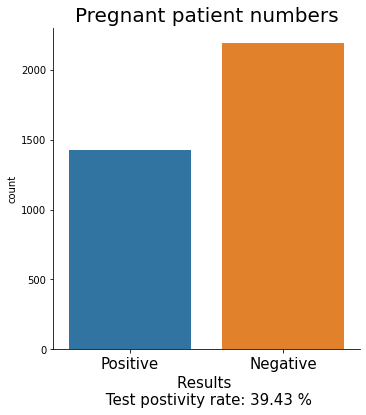

In [22]:
df_pregnancy=df[df['pregnancy']=='Yes']
sns.catplot('covid_res',data=df_pregnancy,kind='count')
plt.title('Pregnant patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_pregnancy['covid_res'].value_counts()[1]/df_pregnancy['covid_res'].size),size=15)
plt.xticks(size=15)

From the above charts, Most of the women's who are pregnant are found to be covid -ve. Although there is not much sifgnifiact difference in Covid positivity and negativity rates.

**Pregnancy is not a good indicator to predict Covid positivity**

**3. Contact with Other Covid +ve person**

In [23]:
df['contact_other_covid'].isna().value_counts()
# True indicates the NULL Values
# False indicates total reported data (might be yes or no)

False    346017
True     153675
Name: contact_other_covid, dtype: int64

Text(0.5, 1.0, 'contact_other_covid \n \n  Ratio=1.32')

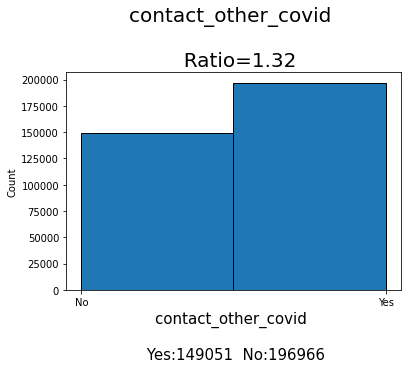

In [24]:
ax=plt.hist(df['contact_other_covid'][df['contact_other_covid'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('contact_other_covid \n \n Yes:{}  No:{}'.format(df['contact_other_covid'].value_counts()[1] , df['contact_other_covid'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('contact_other_covid \n \n  Ratio={0:.02f}'.format(df['contact_other_covid'].value_counts()[0]/df['contact_other_covid'].value_counts()[1])
          ,size=20)

Contact Test positivity

Through this metric we try to understand what are the chances of a person being COVID +ve if he/she recently came in contact with other infected person.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

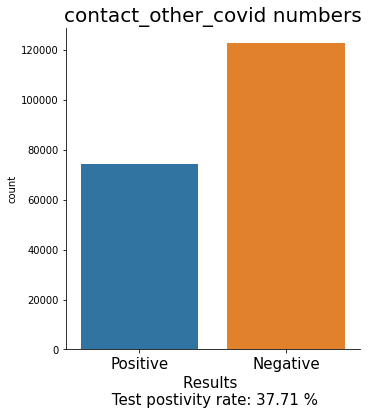

In [26]:
# FROM THOSE WHO ARE REPORTED YES
df_contact_other_covid=df[df['contact_other_covid']=='Yes']
sns.catplot('covid_res',data=df_contact_other_covid,kind='count')
plt.title('contact_other_covid numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_contact_other_covid['covid_res'].value_counts()[1]/df_contact_other_covid['covid_res'].size),size=15)
plt.xticks(size=15)

Just contacting other covid+ve person doesn't guarantee Covid positivity.

This might be the indicator if other attribute values are provided

**4. ICU reported patients**

In [27]:
df['icu'].isna().value_counts()
# True indicates the NULL Values
# False indicates total reported data (might be yes or no)

True     392269
False    107423
Name: icu, dtype: int64

Text(0.5, 1.0, 'icu \n \n  Ratio=11')

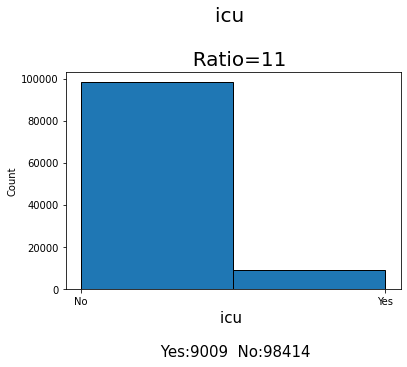

In [28]:
ax=plt.hist(df['icu'][df['icu'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('icu \n \n Yes:{}  No:{}'.format(df['icu'].value_counts()[1] , df['icu'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('icu \n \n  Ratio={0:.0f}'.format(df['icu'].value_counts()[0]/df['icu'].value_counts()[1])
          ,size=20)

ICU patient's test positivity

Through this metric we try to understand what are the chances of a person being COVID +ve if he/she is in ICU.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

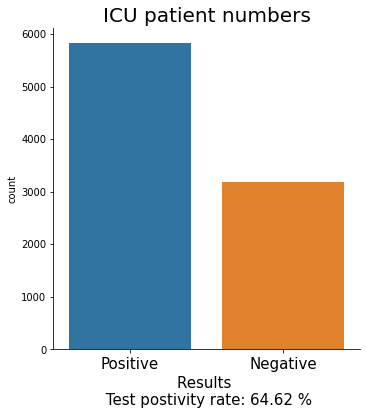

In [29]:
df_icu=df[df['icu']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('ICU patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=15)

here also Covid positivity rate is quite high.

ICU report is the good indicator to predict whether the person is Covid +ve or not

**5. Other Disease reports analysis**

In [30]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'age', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 1584x7200 with 0 Axes>

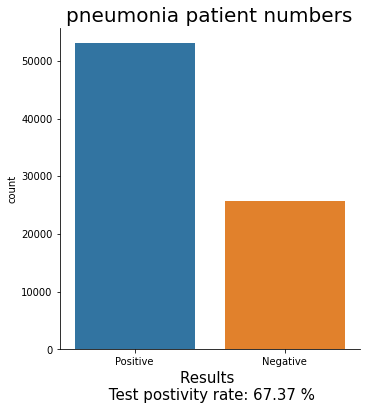

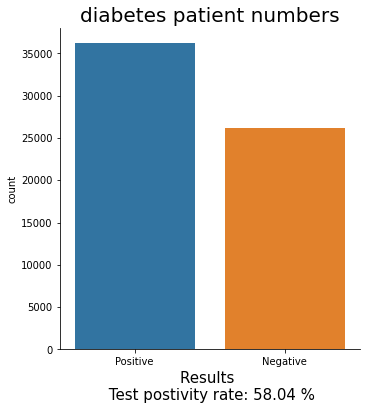

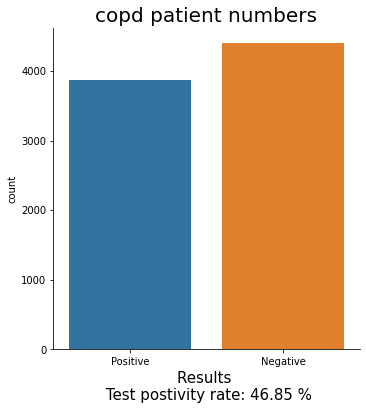

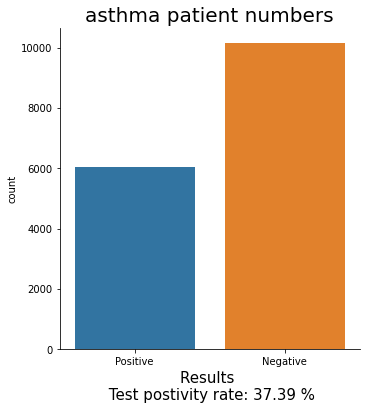

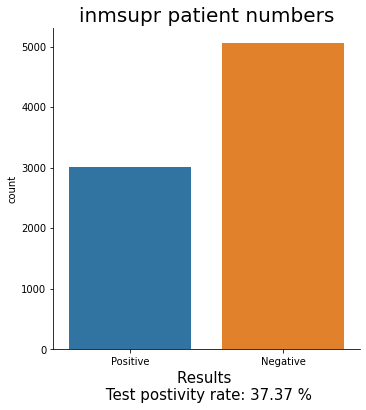

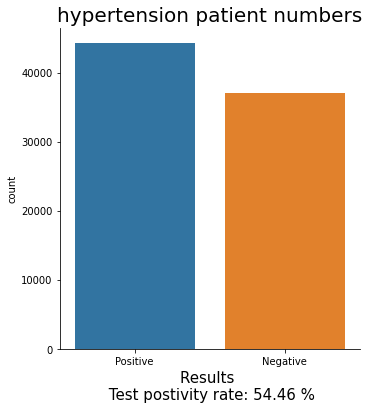

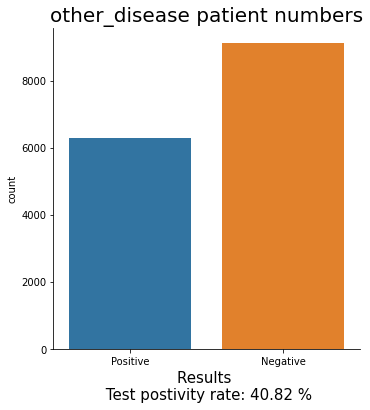

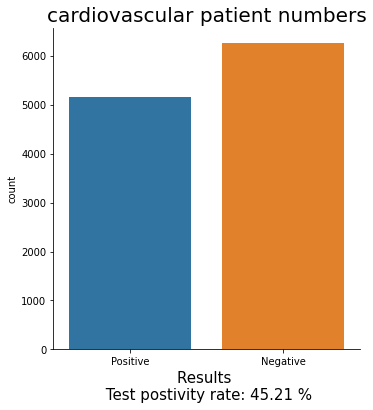

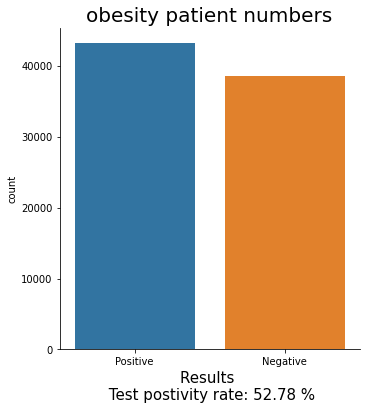

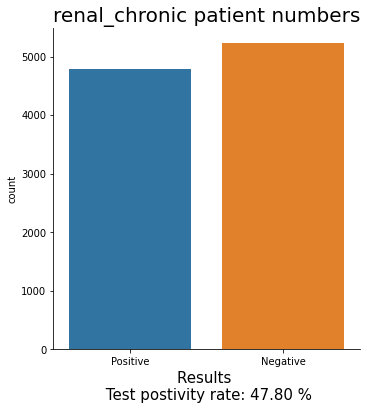

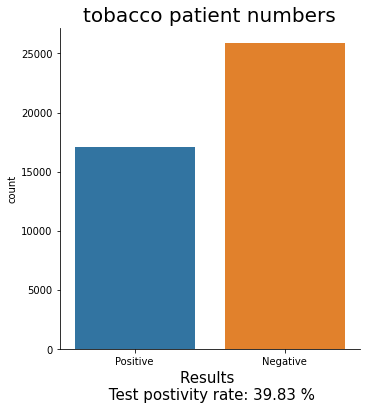

In [31]:
fig2=plt.figure(figsize=(22,100))

# ax1=fig2.add_subplot(11,2,1)
df_pneumonia=df[df['pneumonia']=='Yes']
sns.catplot('covid_res',data=df_pneumonia,kind='count')
plt.title('pneumonia patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_pneumonia['covid_res'].value_counts()[0]/df_pneumonia['covid_res'].size),size=15)
plt.xticks(size=10,)

# ax2=fig2.add_subplot(11,2,2)


# ax3=fig2.add_subplot(11,2,3)
df_icu=df[df['diabetes']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('diabetes patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax4=fig2.add_subplot(11,2,4)


# ax5=fig2.add_subplot(11,2,5)
df_icu=df[df['copd']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('copd patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)


# ax7=fig2.add_subplot(11,2,7)
df_icu=df[df['asthma']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('asthma patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax9=fig2.add_subplot(11,2,9)
df_icu=df[df['inmsupr']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('inmsupr patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax10=fig2.add_subplot(11,2,10)

# ax11=fig2.add_subplot(11,2,11)
df_icu=df[df['hypertension']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('hypertension patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax12=fig2.add_subplot(11,2,12)

# ax13=fig2.add_subplot(11,2,13)
df_icu=df[df['other_disease']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('other_disease patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax14=fig2.add_subplot(11,2,14)

# ax15=fig2.add_subplot(11,2,15)
df_icu=df[df['cardiovascular']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('cardiovascular patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax16=fig2.add_subplot(11,2,16)

# ax17=fig2.add_subplot(11,2,17)
df_icu=df[df['obesity']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('obesity patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax18=fig2.add_subplot(11,2,18)

# ax19=fig2.add_subplot(11,2,19)
df_icu=df[df['renal_chronic']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('renal_chronic patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax20=fig2.add_subplot(11,2,20)

# ax21=fig2.add_subplot(11,2,21)
df_icu=df[df['tobacco']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('tobacco patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax22=fig2.add_subplot(11,2,22)

Observations

There is a high chance of a person being affected by Covid 19, if he/she is a pneumonia patient (67.37 %)

Those patient who are diabetic, have high chance of being covid positive (58.04 %)

Hypertensed and obese patients have decent 50 % probability of being Covid positive (54 % and 52 % respectively)

Let's analyse now, how people of different age groups relates with Covid positivity

**6. Age band**

In [32]:
df1=df
df1
df1.iloc[:,-2]=df.iloc[:,-2].replace('Positive',1)
df1.iloc[:,-2]=df.iloc[:,-2].replace('Negative',0)
# df1.iloc[:,-2]=df.iloc[:,-2].replace('Results awaited',3)
df1
df1 = df1[df1['covid_res']!=3]

In [33]:
def age_band(age):
    
    if age<2:
        return '0-2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Covid Positive vs Age group')

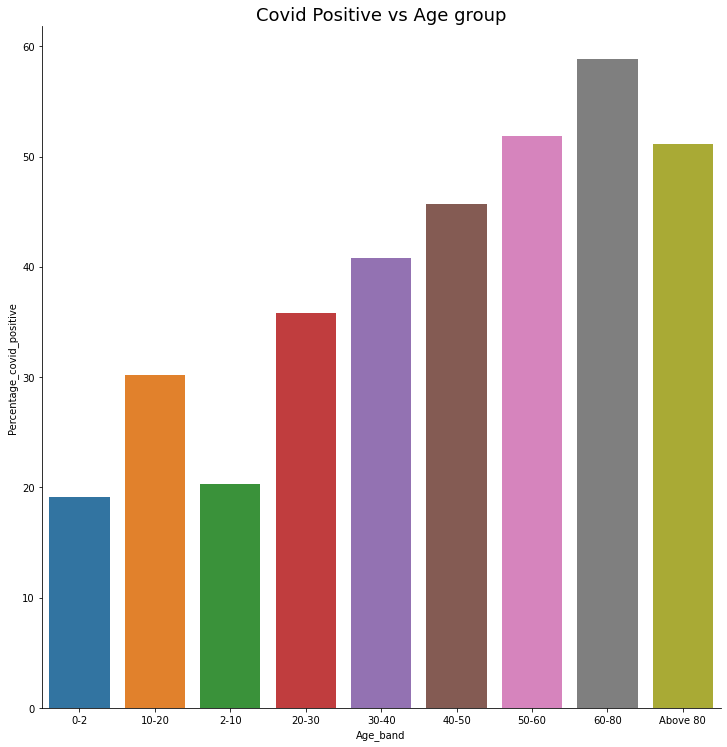

In [34]:
# df_pos=df1[df1['covid_res']=='Positive']
df1['Age_band']=df1['age'].apply(age_band)
df1['Count']=1
df_Age_Band = df1.groupby('Age_band')['covid_res','Count'].sum().reset_index()
df_Age_Band['Percentage_covid_positive']=100*df_Age_Band.covid_res/df_Age_Band.Count
#df_Age_Band.sort_values(by='covid_res',ascending=False).reset_index(drop=True)
df_Age_Band.sort_values(by='Percentage_covid_positive',ascending=False).reset_index(drop=True)

sns.catplot(x = 'Age_band', y ='Percentage_covid_positive', data = df_Age_Band, kind= 'bar', size = 10)
plt.title('Covid Positive vs Age group', size = 18)

Observations

There is high chance of infection to the people of age group 60-80

Senior citizens (age > 50) are most likely to be caught by Covid 19 virus.

Does Covid-19 positivity depends on Gender?, Lets analyse

**7. Sex**

Text(0.5, 0, 'Male- 287112    Female-279486')

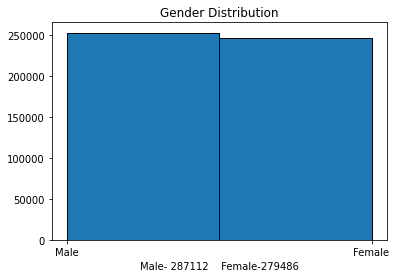

In [35]:
df['sex'].replace(1,'Female',inplace=True)
df['sex'].replace(2,'Male',inplace=True)

plt.hist(df['sex'],bins=2,edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Male- 287112    Female-279486')

In [36]:
df_pos=df[df['covid_res']==1]
#df_pos
pos_male = df_pos[df_pos['sex']=='Male']
pos_female = df_pos[df_pos['sex']=='Female']
#pos_female

54.74514744603616
45.25485255396384


Text(0.5, 0, 'Male- 54.75%    Female-45.25%')

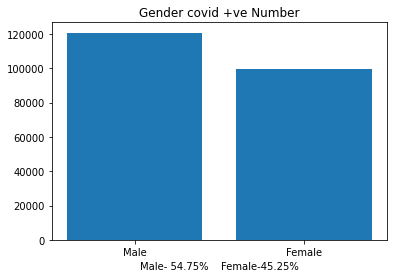

In [37]:
pos=[len(pos_male),len(pos_female)]
gen=['Male','Female']
plt.bar(gen,pos)#,edgecolor='black')
plt.title('Gender covid +ve Number')
male_pos_percent = (len(pos_male)/len(df_pos))*100
female_pos_percent = (len(pos_female)/len(df_pos))*100
print(male_pos_percent)
print(female_pos_percent)
plt.xlabel('Male- 54.75%    Female-45.25%')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gender wise covid+ve age distribution')

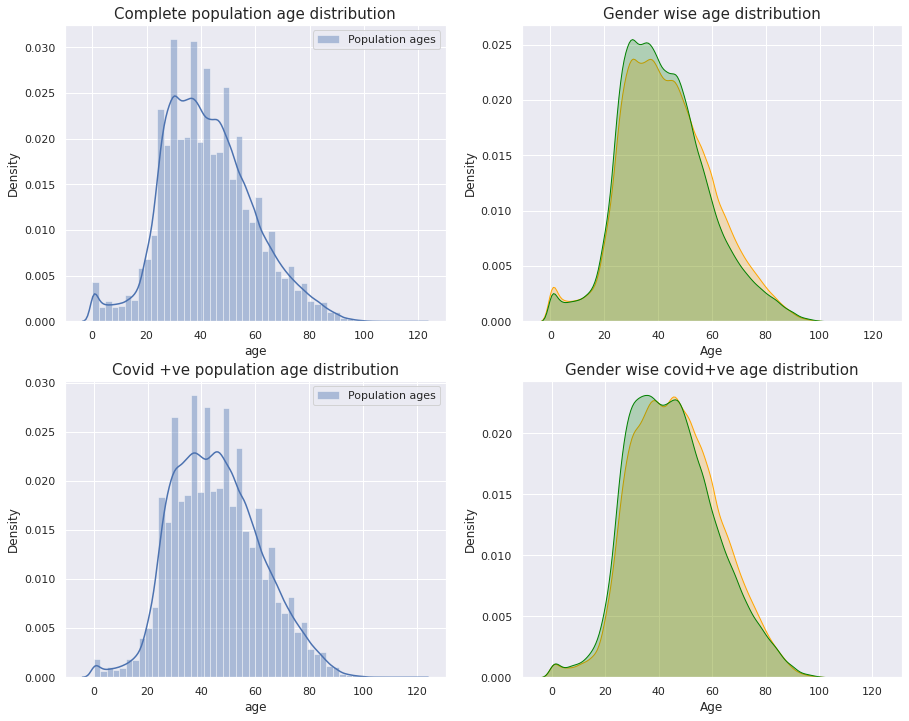

In [38]:
sns.set()
fig1=plt.figure(figsize=(15,12))
ax1=fig1.add_subplot(221)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(222)

df_m=df[df['sex']=='Male']
df_f=df[df['sex']=='Female']

b=sns.kdeplot(df_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)
ax3=fig1.add_subplot(223)
a=sns.distplot(df_pos['age'],ax=ax3,label='Population ages')
ax3.legend()
ax3.set_title('Covid +ve population age distribution',size=15)
ax4=fig1.add_subplot(224)

df_m_pos=df_pos[df_pos['sex']=='Male']
df_f_pos=df_pos[df_pos['sex']=='Female']

b=sns.kdeplot(df_m_pos['age'],shade=True,ax=ax4,label='Male covid+ve age distribution',color='orange')
c=sns.kdeplot(df_f_pos['age'],ax=ax4,label='Female covid+ve age distribution',color='green',shade=True)
ax4.set_xlabel('Age')
ax4.set_title('Gender wise covid+ve age distribution',size=15)

From the above left graph, we can see that we have a bimodal graph with high distribution from 20-60 years. There is also a peak in the lower section of the graph meaning we have high number of infants in our distribution.

On the right, we see that the distribution for both women and men is nearly identical. This is great because it will let us understand the body responses of the sexes with an identical age distribution.

**9. Fatality**

In [39]:
df_pos=df[df['covid_res']==1]
df_pos.reset_index(drop=True,inplace=True)
df_pos['Fatal']=np.nan

i=0
for i in range(len(df_pos)):
    if df_pos['date_died'][i]!='NA':
        df_pos['Fatal'][i]='Yes'

df_pos['Fatal']=df_pos['Fatal'].fillna('No')
df_pos['Fatal']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

0          No
1          No
2          No
3          No
4         Yes
         ... 
220652    Yes
220653     No
220654     No
220655     No
220656     No
Name: Fatal, Length: 220657, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 0, 'Fatality rate: 15.70 %')

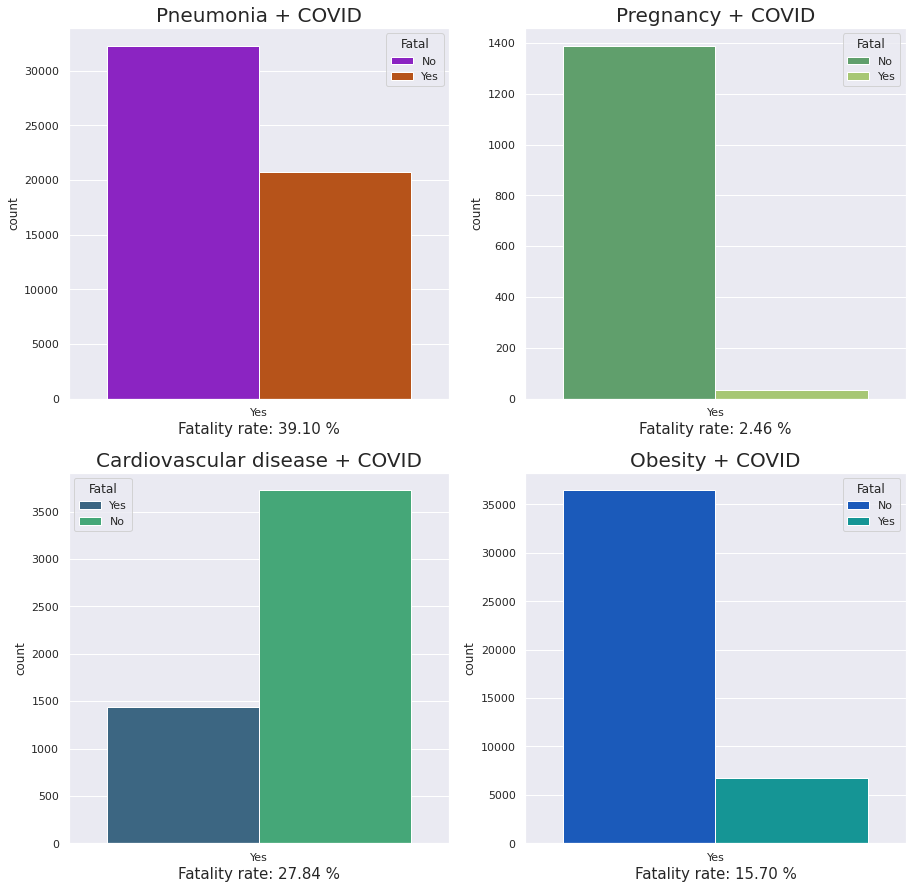

In [40]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.countplot('pneumonia',data=df_pneu,hue='Fatal',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='Fatal',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='Fatal',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='Fatal',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)






ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['Fatal'].value_counts()[1]/df_pneu['Fatal'].shape[0]),size=15)


ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['Fatal'].value_counts()[1]/df_preg['Fatal'].shape[0]),size=15)


ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['Fatal'].value_counts()[1]/df_card['Fatal'].shape[0]),size=15)


ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['Fatal'].value_counts()[1]/df_obes['Fatal'].shape[0]),size=15)

Note:

Dropping date_died column as no relation with predicting covid positive.

Columns- pregnancy, intubed, contct_other_covid have more than 50% null values so dropping

In [41]:
df=df.drop(columns=['date_died','pregnancy','contact_other_covid','intubed','icu'])

**Feature Extraction from date_symptom and entry_date**

In [42]:
df['delta']=abs(df['entry_date']-df['date_symptoms'])
df.loc[1,'delta']
df['delta'] = df['delta'].dt.days.astype('int16')  #Converting Timedelta type to integer days
df['delta']

0          60
1           2
2         152
3         170
4           0
         ... 
499687      6
499688      5
499689      3
499690      2
499691      8
Name: delta, Length: 499692, dtype: int16

Note:

Dropping columns entry_date and date_symptoms

In [43]:
df=df.drop(columns=['entry_date','date_symptoms'])

In [44]:
df.columns

Index(['sex', 'patient_type', 'age', 'pneumonia', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'covid_res', 'delta'],
      dtype='object')

Note:

There are few Null values present in columns that are categorical variables so we will drop Null values

In [45]:
df=df.dropna()

In [46]:
len(df)

496291

In [47]:
df

,sex,patient_type,age,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,delta
0,Male,1,27,No,No,No,No,No,No,No,No,No,No,No,1,60
1,Male,1,24,No,No,No,No,No,No,No,No,No,No,No,1,2
2,Female,2,54,No,No,No,No,No,No,No,No,Yes,No,No,1,152
3,Male,2,30,Yes,No,No,No,No,No,No,No,No,No,No,1,170
4,Female,2,60,No,Yes,No,No,No,Yes,No,Yes,No,No,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,Male,1,77,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0,6
499688,Male,2,63,Yes,No,No,No,No,Yes,No,No,Yes,No,Yes,0,5
499689,Female,1,25,No,No,No,No,No,No,No,No,No,No,No,0,3
499690,Female,1,45,No,No,No,No,No,Yes,No,No,No,No,No,0,2


In [48]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [49]:
X_=df[['sex', 'patient_type', 'pneumonia', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco']]
X_

,sex,patient_type,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
0,Male,1,No,No,No,No,No,No,No,No,No,No,No
1,Male,1,No,No,No,No,No,No,No,No,No,No,No
2,Female,2,No,No,No,No,No,No,No,No,Yes,No,No
3,Male,2,Yes,No,No,No,No,No,No,No,No,No,No
4,Female,2,No,Yes,No,No,No,Yes,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,Male,1,Yes,No,No,No,No,No,Yes,No,No,No,Yes
499688,Male,2,Yes,No,No,No,No,Yes,No,No,Yes,No,Yes
499689,Female,1,No,No,No,No,No,No,No,No,No,No,No
499690,Female,1,No,No,No,No,No,Yes,No,No,No,No,No


In [50]:
oe.fit(X_)
X_=oe.transform(X_)
#X_

In [51]:
X_

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
import numpy as np
arr=np.array(df[['delta','age']])
arr

array([[ 60,  27],
       [  2,  24],
       [152,  54],
       ...,
       [  3,  25],
       [  2,  45],
       [  8,  51]])

In [53]:
arr_=arr.reshape(496291,2)
X=np.append(arr_,X_,axis=1)
X

array([[ 60.,  27.,   1., ...,   0.,   0.,   0.],
       [  2.,  24.,   1., ...,   0.,   0.,   0.],
       [152.,  54.,   0., ...,   1.,   0.,   0.],
       ...,
       [  3.,  25.,   0., ...,   0.,   0.,   0.],
       [  2.,  45.,   0., ...,   0.,   0.,   0.],
       [  8.,  51.,   0., ...,   0.,   0.,   0.]])

In [54]:
y=np.array(df['covid_res'])
y=y.reshape(-1,1)
oe.fit(y)
y=oe.transform(y)
# y.reshape(496291,1)
print(type(y))
y

<class 'numpy.ndarray'>


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [55]:
X

array([[ 60.,  27.,   1., ...,   0.,   0.,   0.],
       [  2.,  24.,   1., ...,   0.,   0.,   0.],
       [152.,  54.,   0., ...,   1.,   0.,   0.],
       ...,
       [  3.,  25.,   0., ...,   0.,   0.,   0.],
       [  2.,  45.,   0., ...,   0.,   0.,   0.],
       [  8.,  51.,   0., ...,   0.,   0.,   0.]])

Standard Scalar

Standardizes data such that mean = 0 and standard deviation = 1

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [57]:
print(X.std())
print(X.shape)
X

0.9999999999999966
(496291, 15)


array([[ 0.17063051, -0.93319815,  0.98814779, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       [-0.71338558, -1.11366638,  0.98814779, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       [ 1.57286293,  0.69101592, -1.01199437, ...,  2.25835415,
        -0.14290986, -0.3068147 ],
       ...,
       [-0.69814393, -1.0535103 , -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       [-0.71338558,  0.14961123, -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       [-0.62193564,  0.51054769, -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ]])

In [58]:
from sklearn.model_selection import train_test_split
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
X_test

array([[ 2.06059595, -0.39179346, -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       [-0.7438689 , -0.45194954, -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       [-0.6371773 ,  1.41288883, -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       ...,
       [ 1.58810459, -0.51210561, -1.01199437, ...,  2.25835415,
        -0.14290986, -0.3068147 ],
       [ 0.65836353,  1.47304491, -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ],
       [-0.27137754, -0.57226169, -1.01199437, ..., -0.44280035,
        -0.14290986, -0.3068147 ]])

**Classification**

Importing Important parameters

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

**1. Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print("Train accuracy:- \t",round(precision_score(y_train_pred,y_train)*100,2))
print("Test accuracy:- \t",round(accuracy_score(y_test_pred,y_test)*100,2))
print("Recall:- \t",round(recall_score(y_test_pred,y_test)*100,2))
print("Precision:- \t",round(precision_score(y_test_pred,y_test)*100,2))
print('F1 score:- \t',round(f1_score(y_test,y_test_pred)*100,2))

Train accuracy:- 	 37.28
Test accuracy:- 	 63.2
Recall:- 	 64.45
Precision:- 	 37.25
F1 score:- 	 47.21


In [63]:
confusion_matrix(y_test_pred,y_test)

array([[76550, 45404],
       [14870, 26953]])

**2. Decision Trees¶**

In [64]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
y_test_pred = DT.predict(X_test)
y_train_pred = DT.predict(X_train)
print("Train accuracy:- \t",round(precision_score(y_train_pred,y_train)*100,2))
print("Test accuracy:- \t",round(accuracy_score(y_test_pred,y_test)*100,2))
print("Recall:- \t",round(recall_score(y_test_pred,y_test)*100,2))
print("Precision:- \t",round(precision_score(y_test_pred,y_test)*100,2))
print('F1 score:- \t',round(f1_score(y_test,y_test_pred)*100,2))

Train accuracy:- 	 57.73
Test accuracy:- 	 60.3
Recall:- 	 57.55
Precision:- 	 38.68
F1 score:- 	 46.26


In [66]:
confusion_matrix(y_test_pred,y_test)

array([[70774, 44371],
       [20646, 27986]])

**3. Decision Forest Classifier**

In [67]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
y_test_pred = Rf.predict(X_test)
y_train_pred = Rf.predict(X_train)
print("Train accuracy:- \t",round(precision_score(y_train_pred,y_train)*100,2))
print("Test accuracy:- \t",round(accuracy_score(y_test_pred,y_test)*100,2))
print("Recall:- \t",round(recall_score(y_test_pred,y_test)*100,2))
print("Precision:- \t",round(precision_score(y_test_pred,y_test)*100,2))
print('F1 score:- \t',round(f1_score(y_test,y_test_pred)*100,2))
confusion_matrix(y_test,y_test_pred)

Train accuracy:- 	 61.59
Test accuracy:- 	 61.04
Recall:- 	 57.85
Precision:- 	 43.54
F1 score:- 	 49.68


array([[68466, 22954],
       [40854, 31503]])

**Conclusion :**

therefore the Decision Forest Classifier Model predicted Train accuracy is 61.88% which is far better than other model.
  